/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

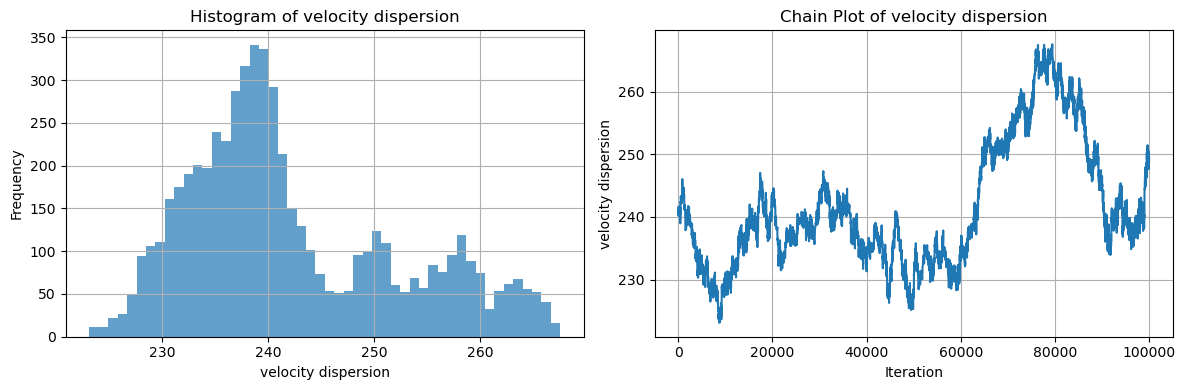

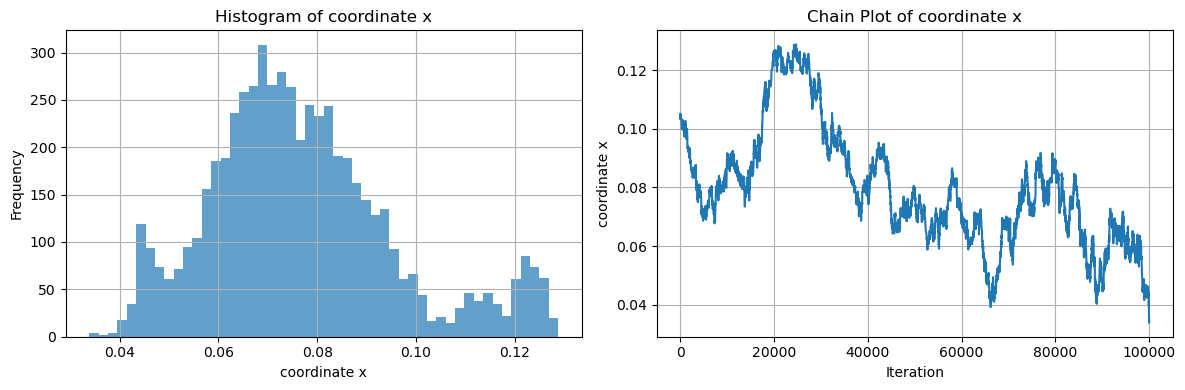

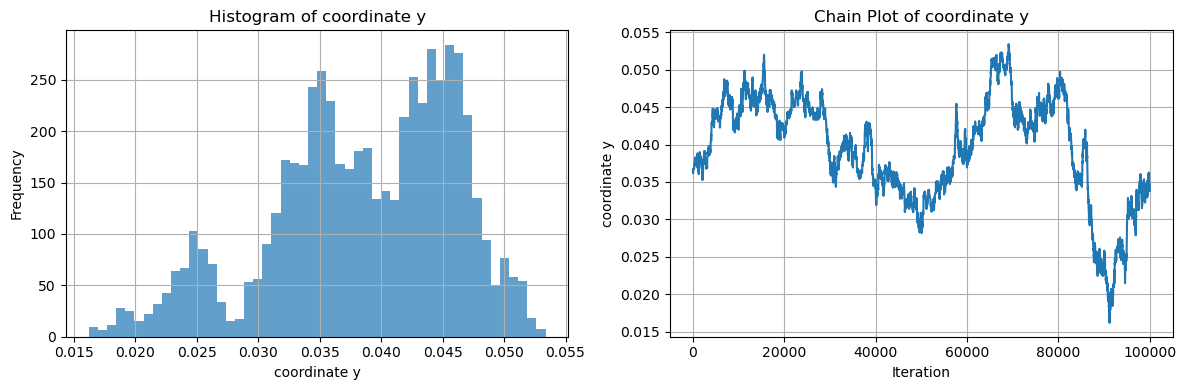

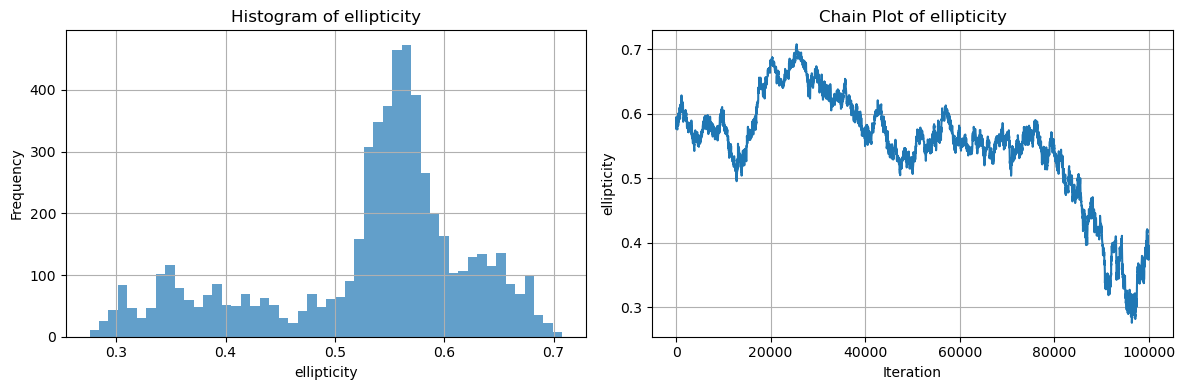

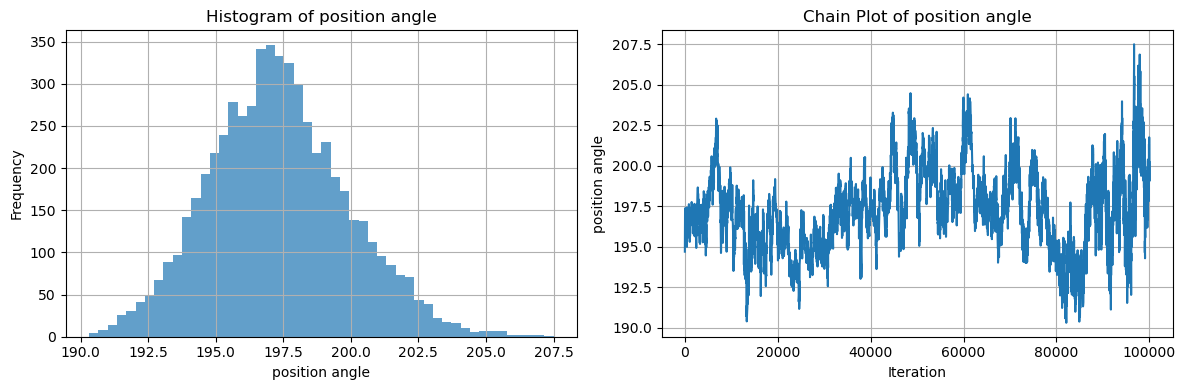

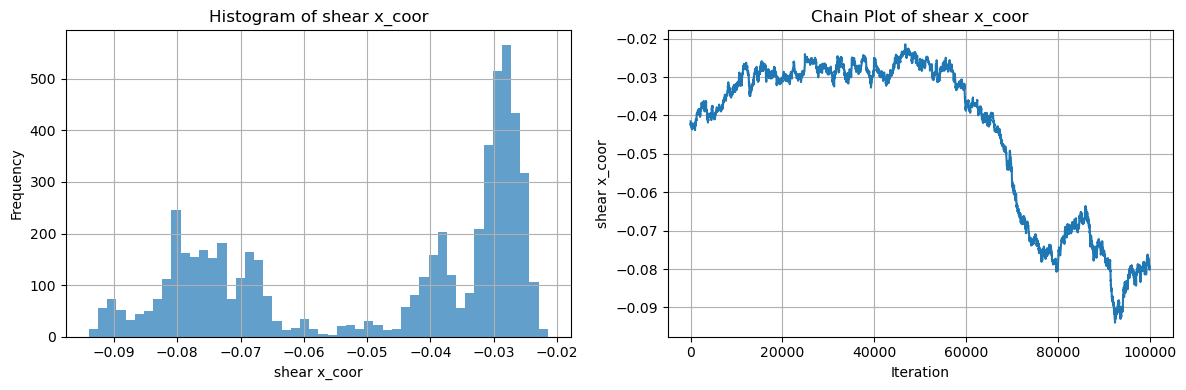

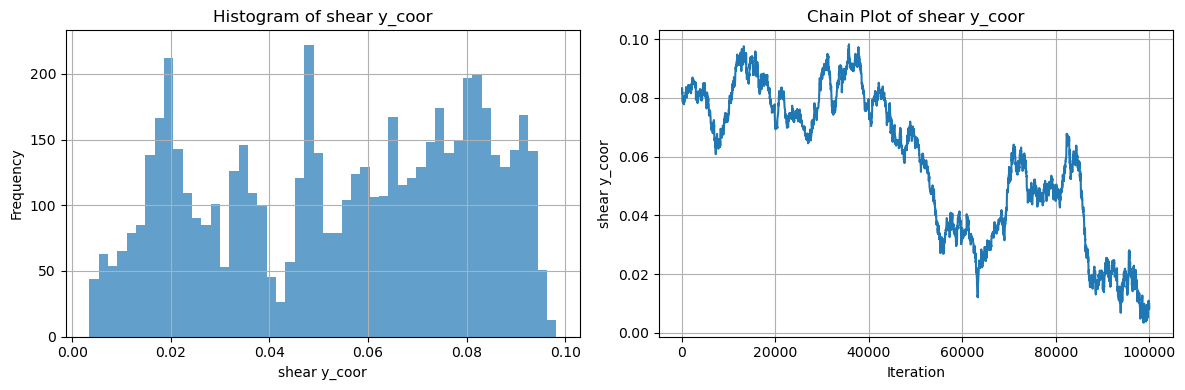

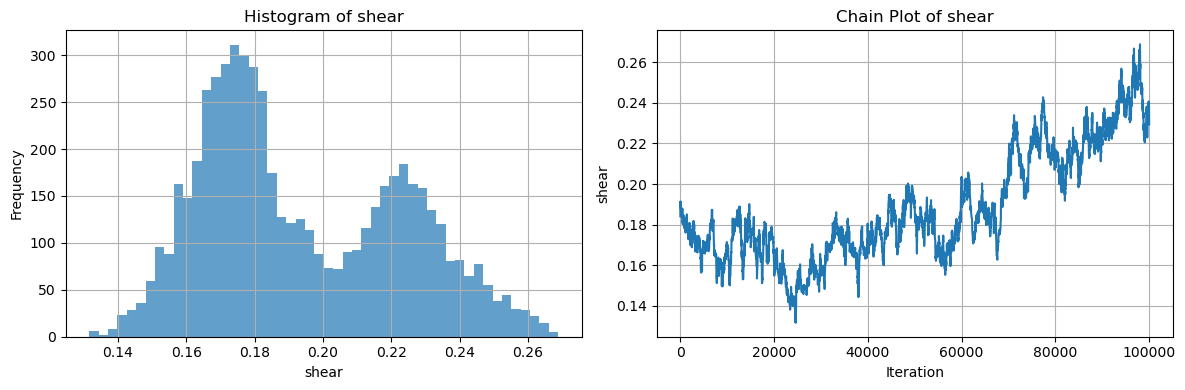

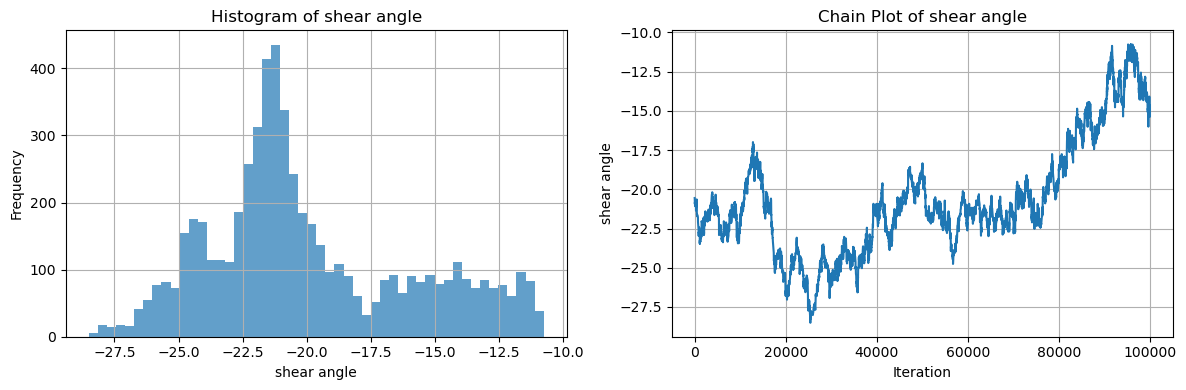

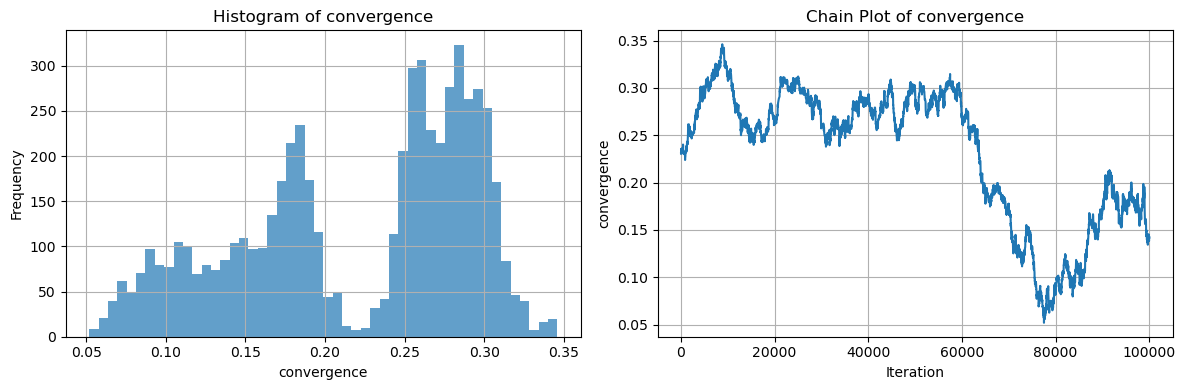

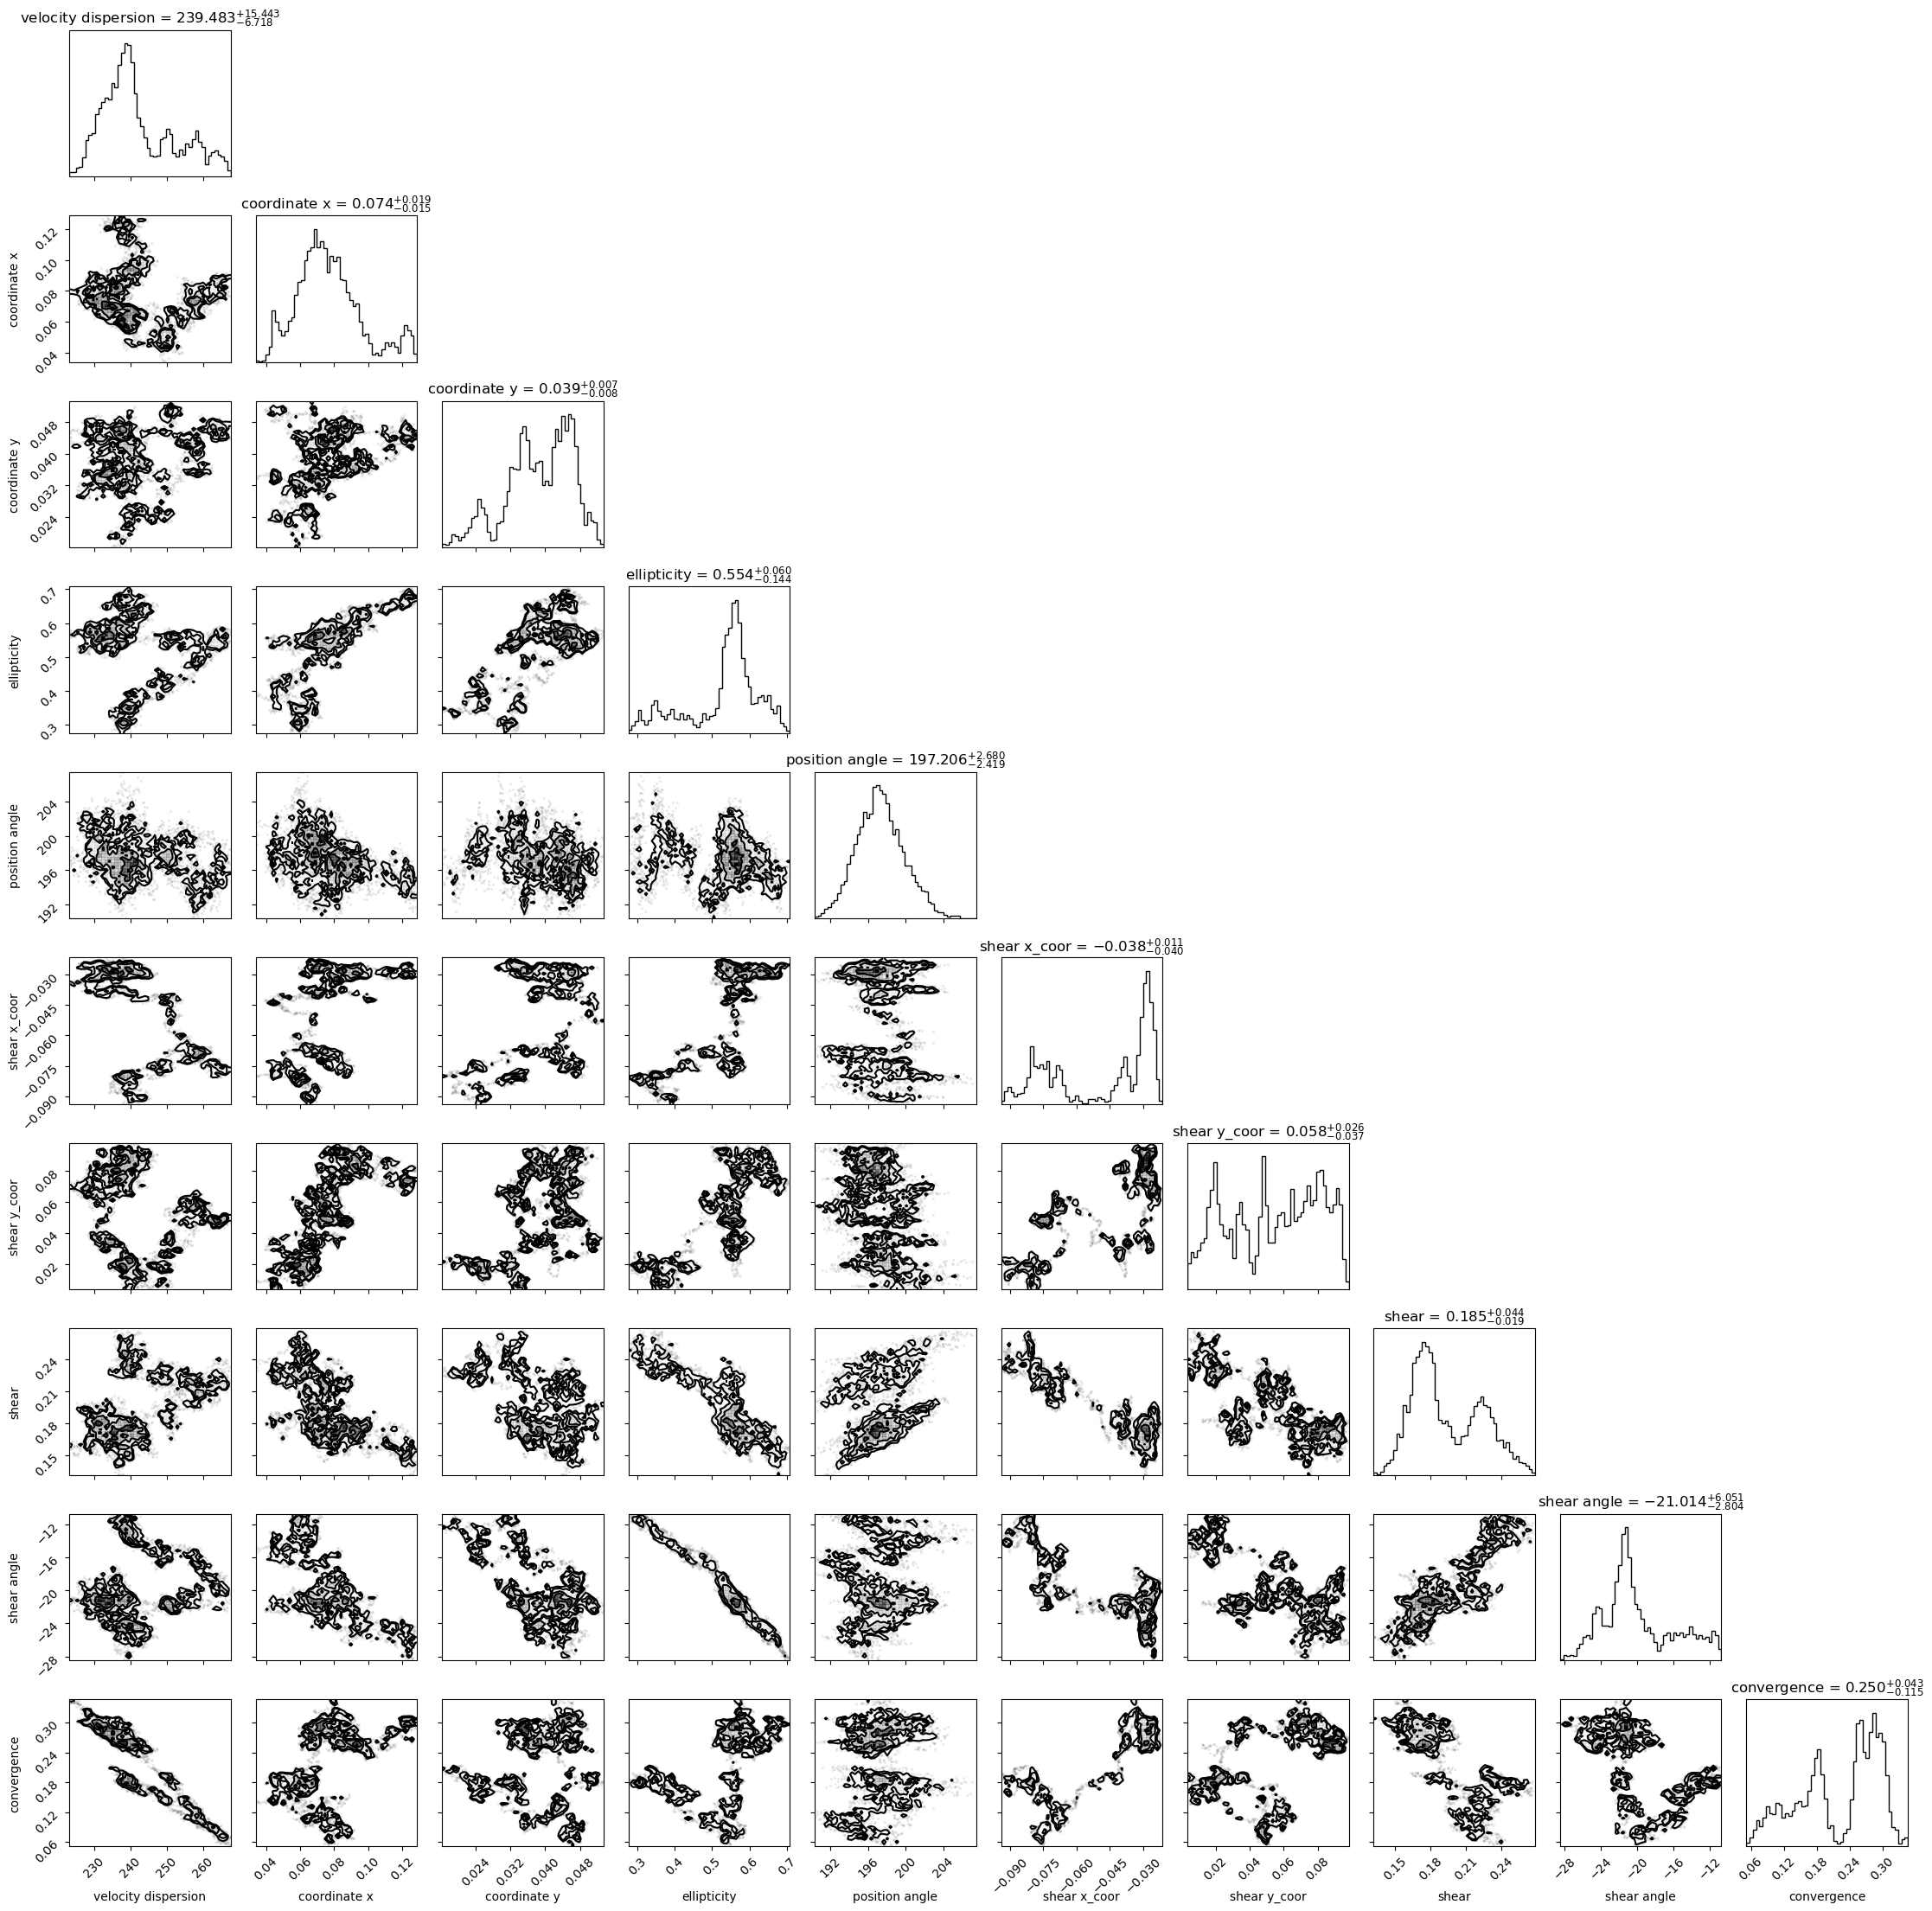

Total Iterations: 100000
Accepted Samples: 5804
Acceptance Rate: 0.05804


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import datetime
import corner

# Define the directory to save the images
image_directory = "outSPR_mcmc_plots"

# Create the directory if it doesn't exist
if not os.path.exists(image_directory):
    os.makedirs(image_directory)

# Load the mcmc.dat file
data = np.genfromtxt('outSPR_mcmc.dat', dtype=str, skip_header=1)

# Extract accepted sample points
accept_indices = np.where(data[:, 0] == "accept")[0]  # Get the indices as a 1D array
num_accepted_samples = accept_indices.size  # Number of accepted samples
samples = data[accept_indices, 2:].astype(float)  # Exclude the first column and consider columns 2 onwards

# Print out the median parameter values with
# 16th and 84th percentile as the lower
# and upper uncertainty bounds
labels = ['velocity dispersion', 'coordinate x', 'coordinate y', 'ellipticity', 'position angle', 'shear x_coor', 'shear y_coor', 'shear', 'shear angle', 'convergence']
for i in range(samples.shape[1]):
    try:
        mcmc = np.percentile(samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = r"$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}$"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        display(Math(txt))
    except IndexError:
        print("IndexError: Index out of range. i =", i)

# Set the number of bins
num_bins = 50

# Remove existing images in the directory
existing_images = os.listdir(image_directory)
for image in existing_images:
    if image.endswith(".png"):
        os.remove(os.path.join(image_directory, image))

# Plot histograms and chain plots for each parameter
for i in range(samples.shape[1]):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row and 2 columns of subplots
    
    # Histogram
    axs[0].hist(samples[:, i], bins=num_bins, alpha=0.7)
    axs[0].set_xlabel(labels[i])
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of ' + labels[i])
    axs[0].grid(True)
    
    # Chain plot
    axs[1].plot(accept_indices, samples[:, i])
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel(labels[i])
    axs[1].set_title('Chain Plot of ' + labels[i])
    axs[1].grid(True)
    
    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    
    # Save the plots as a single image
    image_path = os.path.join(image_directory, f"plot_{labels[i]}.png")
    plt.savefig(image_path)
    plt.show()  # Display the plot in the coding software

# Plot the corner plot
figure = corner.corner(samples, labels=labels, title_fmt='.3f', title_kwargs={'fontsize': 12}, show_titles=True, bins=50)
plt.tight_layout()

# Save the corner plot as an image
corner_image_path = os.path.join(image_directory, "outSPR_mcmc_corner.png")
plt.savefig(corner_image_path)
plt.show()  # Display the corner plot in the coding software

# Calculate acceptance rate
total_iterations = data.shape[0]
acceptance_rate = num_accepted_samples / total_iterations

print("Total Iterations:", total_iterations)
print("Accepted Samples:", num_accepted_samples)
print("Acceptance Rate:", acceptance_rate)